In [1]:
import pandas as pd
import numpy as np

from scipy.stats.stats import pearsonr
import pingouin as pg

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load features from the CNN model
train_feat_max = pd.read_csv('/project/DSone/as3ek/data/seem_train_2048_features_max.csv')
valid_feat_max = pd.read_csv('/project/DSone/as3ek/data/seem_valid_2048_features_max.csv')

In [3]:
# Load RNA Seq Data
rna_seq = pd.read_csv('/project/DSone/as3ek/data/transcriptome_merged.csv')

/apps/software/standard/core/anaconda/5.2.0-py3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13468,13469,13470) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Drop unnecessary columns
rna_seq = rna_seq.drop(['Gene', 'PID', 'RNASes_Bx_loc', 'SEEM ID', 'Bx Date', 'Accession #'], axis=1)

In [5]:
# Load cleaned EE RNA Seq Data
ee_rna_seq = pd.read_csv('/project/DSone/as3ek/data/ee_trascript.csv')
ee_rna_seq = ee_rna_seq.drop(['Unnamed: 0'], axis=1)

In [6]:
# Filter all data to get only normal RNA Seq data
normal_rna_seq = rna_seq[rna_seq['Diagnosis'] == 'CONTROL'].reset_index(drop=True)
normal_rna_seq = normal_rna_seq.drop('Diagnosis', axis=1)

In [7]:
ee_rna_seq.head()

,A1BG,A1CF,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AAED1,AAGAB,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,FileNames
0,2.938328,19.990509,83.735050,2.656216,3.404470,17.141710,11.889671,57.604313,2.052005,22.352093,...,7.167301,6.760921,23.934557,1.351300,5.770310,2.624760,32.301320,16.912931,10.427124,SEEM_1
1,4.698266,15.687117,92.621060,1.957990,0.306087,12.404878,9.844436,84.911210,1.641775,21.663334,...,7.521921,6.561717,18.160603,1.151140,6.536171,3.283770,34.461420,14.909936,13.230409,SEEM_3
2,3.455630,13.785192,107.816505,3.281972,0.010000,13.406025,8.643127,49.870205,2.645186,18.025269,...,4.720486,4.125326,13.924426,0.878572,4.932373,2.385005,29.004587,15.764729,6.827882,SEEM_4
3,2.466141,36.609490,135.728450,3.121654,0.293090,17.032896,12.018597,91.219810,3.087415,23.395113,...,8.026385,7.405385,14.101945,2.055490,7.218950,4.769273,30.454320,25.666950,14.545485,SEEM_5
4,3.249304,30.674992,115.543710,2.711289,1.881430,19.385916,11.410261,96.130104,1.817835,18.924387,...,6.723240,6.889716,18.950125,1.843850,7.449580,3.398000,22.919546,26.630081,12.240758,SEEM_6


In [8]:
normal_rna_seq.head()

,A1BG,A1CF,A2M,A4GALT,A4GNT,AAAS,AACS,AADAC,AAED1,AAGAB,...,ZW10,ZWILCH,ZWINT,ZXDB,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3,FileNames
0,1.527489,39.161606,141.393680,2.250741,3.340980,13.393648,11.521561,190.26294,3.802879,27.817423,...,7.966211,5.824094,15.380531,1.90331,6.084198,5.986877,19.513960,30.423355,13.065509,GI-17-2781A
1,1.836630,20.815561,70.397380,1.366245,8.056910,13.729294,11.792672,188.86170,2.597826,19.777740,...,6.067741,3.992341,12.340939,1.04346,4.722662,2.653590,24.902603,14.547653,10.382214,GI-17-5415A
2,2.070108,30.049267,78.129480,2.200778,8.668561,14.197790,13.160649,299.86722,2.576309,22.687897,...,6.487394,4.760917,12.637662,1.09973,5.131794,4.623030,23.566916,17.086746,8.982910,GI-17-5671A
3,2.323137,27.274525,93.843880,2.508640,1.156290,15.076123,11.050514,176.36838,1.392020,19.399889,...,4.988570,2.749776,13.213606,1.35546,5.087205,2.442820,26.665813,20.346804,7.571774,GI-17-6710A
4,1.550304,28.912386,78.544624,2.113191,0.260323,14.713420,10.754949,272.44060,2.326984,22.267065,...,7.437720,5.820460,18.061235,1.39190,5.067470,3.432585,24.128992,15.404562,10.151729,GI-17-6728A


In [18]:
rna_seq_clean = pd.concat([ee_rna_seq, normal_rna_seq], ignore_index=True)
rna_seq_clean.to_csv('/scratch/as3ek/histo_visual_recog/scripts/data/rna_seq_clean.csv', index=False)

In [9]:
# Filter features to get EE data and merge from train and valid
ee_train_feat_max = train_feat_max[train_feat_max['fname'].str.contains('SEEM')].reset_index(drop=True)
ee_valid_feat_max = valid_feat_max[valid_feat_max['fname'].str.contains('SEEM')].reset_index(drop=True)
ee_feat_max = pd.concat([ee_train_feat_max, ee_valid_feat_max])

# Clean the name field
ee_feat_max['fname'] = ee_feat_max['fname'].str.split('__').str[0].str.split('_').str[0] + '_' + ee_feat_max['fname'].str.split('__').str[0].str.split('_').str[1]

In [10]:
# Filter features to get Normal data and merge from train and valid
normal_train_feat_max = train_feat_max[train_feat_max['fname'].str.contains('G')].reset_index(drop=True)
normal_valid_feat_max = valid_feat_max[valid_feat_max['fname'].str.contains('G')].reset_index(drop=True)
normal_feat_max = pd.concat([normal_train_feat_max, normal_valid_feat_max], ignore_index=True)

# Clean the name field
normal_feat_max['fname'] = normal_feat_max['fname'].str.split('_').str[0].str.replace('GI', 'GI-').str.split(' ').str[0] + 'A'

In [11]:
ee_feat_max_grpd = ee_feat_max.groupby('fname', as_index=False).mean()
normal_feat_max_grpd = normal_feat_max.groupby('fname', as_index=False).mean()

In [12]:
ee_feat_max_grpd.head()

,fname,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,SEEM_1,1.723790,1.195093,1.874366,1.430428,0.277370,0.991679,0.503959,1.797822,1.629920,...,2.466329,1.443165,1.082503,1.312724,0.235111,0.796917,1.869503,1.113020,1.191263,0.056052
1,SEEM_10,1.803769,1.198247,1.717301,1.604401,0.476536,1.173443,0.762336,1.798167,1.683229,...,3.042294,1.241903,1.251948,1.261401,0.185328,0.764982,1.885094,1.147256,1.306315,0.053833
2,SEEM_11,1.839678,1.109125,1.795351,1.846466,0.301508,0.982374,0.443397,1.838318,1.483076,...,2.463452,1.310416,1.403336,1.325597,0.131017,0.787292,1.950734,1.328977,1.445002,0.063884
3,SEEM_12,1.821209,1.187168,2.104666,1.848633,0.309840,1.056440,0.394084,1.941029,1.579398,...,2.474058,1.107714,1.161075,1.326263,0.141429,0.784036,2.120116,1.645199,1.480057,0.041407
4,SEEM_13,1.800788,1.292956,1.938971,1.801571,0.471458,1.197823,0.602479,1.960979,1.664967,...,2.985801,1.388376,1.586149,1.305624,0.179960,0.802461,2.056900,1.527797,1.417633,0.093936


In [13]:
normal_feat_max_grpd.head()

,fname,0,1,2,3,4,5,6,7,8,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,GI-17-10289A,0.260111,1.423399,1.529038,0.656326,10.395761,0.778228,6.163717,0.451917,9.920865,...,1.187545,8.888238,5.410122,0.956113,2.450119,1.899484,0.726906,4.705795,0.918743,7.644601
1,GI-17-10498A,0.344415,1.850256,1.102778,0.766037,9.649113,0.772980,5.501334,0.512503,9.563385,...,1.633792,9.495594,5.150724,1.188136,1.573708,1.898699,0.876582,4.329456,1.221981,7.892415
2,GI-17-10706A,0.262353,1.623513,1.408395,0.742105,10.027711,0.805156,5.582621,0.459997,9.481679,...,1.490235,8.735701,4.794194,0.953371,1.483726,2.025910,0.795356,4.577748,0.722669,7.532604
3,GI-17-2781A,0.195766,1.393006,1.084037,0.447820,11.610514,0.629442,6.368178,0.334832,11.392850,...,1.032879,10.205103,5.184973,0.708134,0.959795,2.146943,0.606720,5.210464,0.731415,9.004182
4,GI-17-5073A,0.362888,1.639938,1.106474,0.640463,9.629265,0.981262,5.461282,0.571386,9.388461,...,1.486018,9.134166,4.606297,1.232272,1.667253,2.021587,0.995925,4.708720,0.975759,7.714748


In [17]:
feat_max_grpd_clean = pd.concat([ee_feat_max_grpd, normal_feat_max_grpd], ignore_index=True)
feat_max_grpd_clean.to_csv('/scratch/as3ek/histo_visual_recog/scripts/data/max_features_grouped_clean.csv', index=False)

In [15]:
# Merge seq with features
ee_seq_feat = pd.merge(ee_rna_seq, ee_feat_max_grpd, left_on='FileNames', right_on='fname')
normal_seq_feat = pd.merge(normal_rna_seq, normal_feat_max_grpd, left_on='FileNames', right_on='fname')

In [22]:
# Concate EE and normal frames
seq_feat = pd.concat([ee_seq_feat, normal_seq_feat], ignore_index=True)
seq_feat.to_csv('/scratch/as3ek/histo_visual_recog/results/rnaseq_feat.csv', index=False)

In [23]:
# Getting list of all columns for correlation b/w
x = list(ee_rna_seq)
x.remove('FileNames')

y = list(ee_feat_max_grpd)
y.remove('fname')

In [200]:
# corr = pg.pairwise_corr(seq_feat, columns=[x, y], method='pearson')
corr = seq_feat.corr()
corr_fltrd = corr[x][corr.index.isin(y)]
corr_fltrd = corr_fltrd.round(3)

In [201]:
corr_fltrd.to_csv('/scratch/as3ek/histo_visual_recog/results/gene_feat_corr.csv', index=False)

In [131]:
# Make a copy
df = corr_fltrd.copy().T

# Replace all values below cutoff with 0
for col in y:
    df.loc[np.abs(df[col]) < 0.8, col] = 0
    
# Remove all values below cutoff from columns
df = df.T.loc[:, (df.T != 0).any(axis=0)]

# Remove all values below cutoff from rows
df = df[(df.T != 0).any()]

In [192]:
df.head()

,ALDOB,AMACR,APOH,CA2,CAPN13,CDK20,CHAD,CRIP3,CYP4F3,EPHX1,...,SEMA6C,SHMT1,SLC5A4,TMEM229A,TMEM25,TMEM52,UNC5D,UNC93A,UPB1,USP2
0,0.0,0.0,0.0,-0.844,-0.820,-0.813,0.0,0.0,-0.820,-0.873,...,-0.819,-0.802,0.0,0.000,0.0,0.0,0.0,0.0,-0.889,-0.805
2,0.0,0.0,0.0,0.000,0.000,0.000,0.0,0.0,0.000,0.000,...,0.000,0.000,0.0,0.000,0.0,0.0,0.0,0.0,-0.821,0.000
3,0.0,0.0,0.0,-0.814,-0.815,-0.813,0.0,0.0,-0.812,-0.846,...,-0.815,0.000,0.0,0.000,0.0,0.0,0.0,0.0,-0.884,0.000
4,0.0,0.0,0.0,0.844,0.807,0.827,0.0,0.0,0.832,0.870,...,0.823,0.808,0.0,0.801,0.0,0.0,0.0,0.0,0.894,0.801
6,0.0,0.0,0.0,0.839,0.802,0.820,0.0,0.0,0.831,0.864,...,0.815,0.801,0.0,0.000,0.0,0.0,0.0,0.0,0.887,0.000


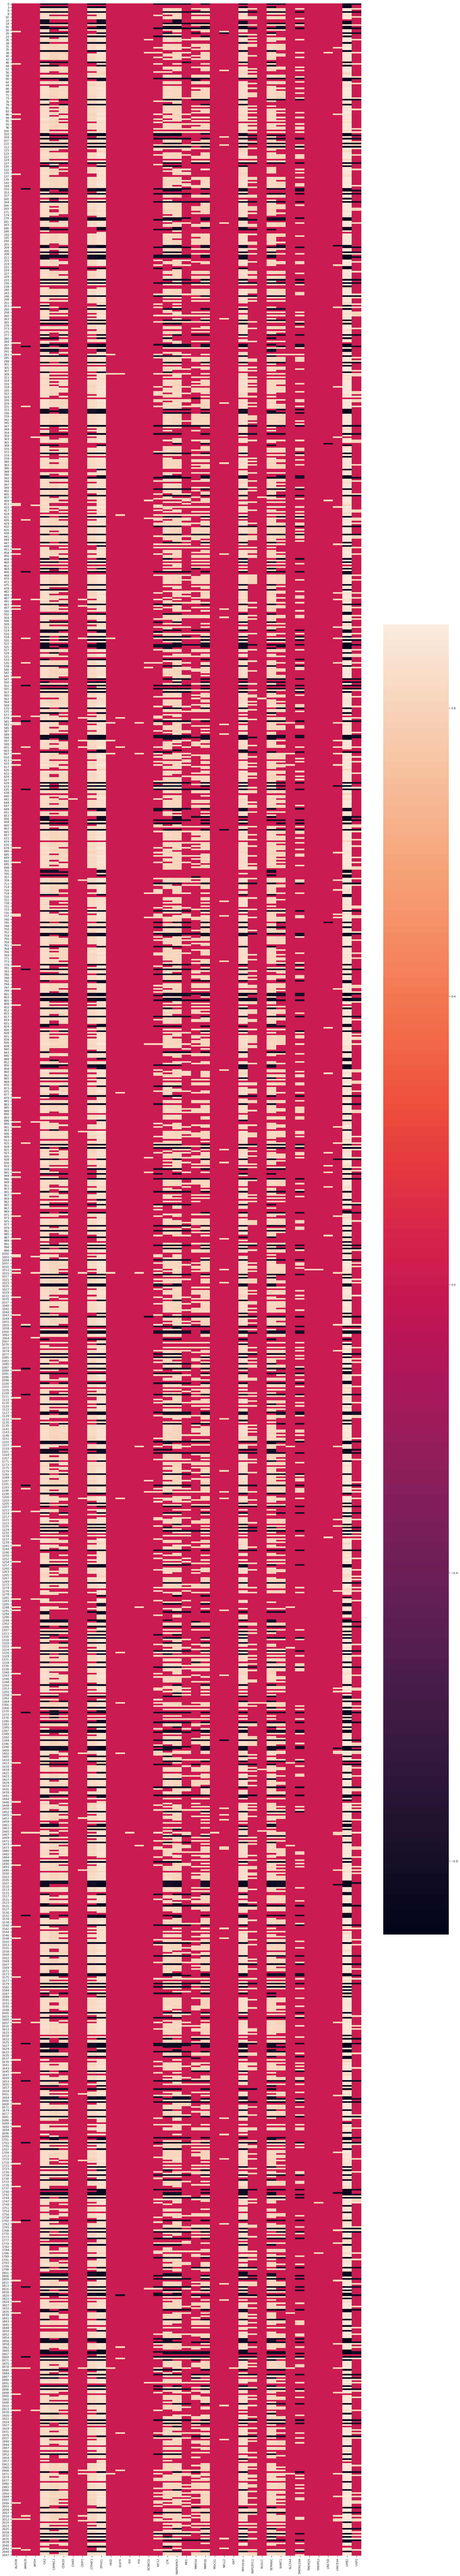

In [135]:
plt.figure(figsize=(30, 180))

sns.heatmap(df)

In [136]:
genes = list(df.columns)

In [137]:
gene_map = pd.read_csv('/scratch/as3ek/histo_visual_recog/scripts/data/custom.txt', sep='\t')

In [139]:
gene_map[gene_map['Approved symbol'].isin(genes)].to_csv('/scratch/as3ek/histo_visual_recog/results/gene_high_corr.csv', index=False)

In [142]:
# Get p values for identified gene feature pairs
alpha = 0.05
sgnfct_seq_feat_corr = pd.DataFrame()

for a in genes:
    for b in y:
        prsn_r, p_value = pearsonr(seq_feat[a], seq_feat[b])
        
        if p_value < alpha:
            tmp = pd.DataFrame([a, b, prsn_r, p_value]).T
            sgnfct_seq_feat_corr = pd.concat([sgnfct_seq_feat_corr, tmp], ignore_index=True)

In [148]:
sgnfct_seq_feat_corr.columns = ['gene', 'feature', 'pearson_r', 'p_value']
sgnfct_seq_feat_corr.to_csv('/scratch/as3ek/histo_visual_recog/results/gene_high_corr_cutoff_7_scores.csv', index=False)

In [202]:
# Make a copy
df_cl = corr_fltrd.copy().T

# Replace all values below cutoff with 0
for col in y:
    df_cl.loc[np.abs(df_cl[col]) < 0.8, col] = 0
    
# Remove all 0 values from columns
df_cl = df_cl.loc[:, (df_cl != 0).any(axis=0)]

# Remove all 0 values from rows
df_cl = df_cl[(df_cl.T != 0).any()]

df_cl = df_cl.T
# df.loc[:, (df != 0).any(axis=0)]
# df[(df.T != 0).any()]

In [152]:
from sklearn.cluster import KMeans

In [205]:
kmeans_all_data = KMeans(n_clusters=5, random_state=0).fit(corr_fltrd)
kmeans_cutoff_data = KMeans(n_clusters=5, random_state=0).fit(df_cl)

In [206]:
corr_fltrd['cluster'] = kmeans_all_data.labels_
df_cl['cluster'] = kmeans_cutoff_data.labels_

In [219]:
feat_cluster = pd.DataFrame()

for cluster in np.unique(df_cl['cluster']):
    cl = df_cl[df_cl['cluster'] == cluster].drop('cluster', axis=1).copy().T
    
    # Remove all 0 values from columns
    cl = cl.loc[:, (cl != 0).any(axis=0)]

    # Remove all 0 values from rows
    cl = cl[(cl.T != 0).any()]
    
    tmp = pd.DataFrame([cluster, list(cl.index), len(cl.index), list(cl.columns), len(cl.columns)]).T
    feat_cluster = pd.concat([feat_cluster, tmp])

In [221]:
feat_cluster.columns = ['cluster', 'genes', 'num_genes', 'features', 'num_features']

In [222]:
feat_cluster.to_csv('/scratch/as3ek/histo_visual_recog/results/feature_clusters_cutoff_8.csv', index=False)

In [226]:
np.min(corr_fltrd['DUOXA2'])

-0.44

In [235]:
np.mean(normal_rna_seq[np.unique(sgnfct_seq_feat_corr['gene'])[0]])

4035.613696

In [234]:
np.mean(ee_rna_seq[np.unique(sgnfct_seq_feat_corr['gene'])[0]])

2174.0717784313724

In [233]:
np.unique(sgnfct_seq_feat_corr['gene'])[0]

array(['ALDOB', 'AMACR', 'APOH', 'CA2', 'CAPN13', 'CDK20', 'CHAD',
       'CRIP3', 'CYP4F3', 'EPHX1', 'HGD', 'IGSF9', 'ISX', 'IYD', 'KCNK10',
       'KIF12', 'LTK', 'MAPKAPK3', 'ME1', 'MMP24', 'MMP28', 'MOCS1',
       'NELL2', 'OAT', 'PPP1R36', 'RAPGEFL1', 'RGS11', 'SEMA6C', 'SHMT1',
       'SLC5A4', 'TMEM229A', 'TMEM25', 'TMEM52', 'UNC5D', 'UNC93A',
       'UPB1', 'USP2'], dtype=object)

In [236]:
normal_rna_seq[np.unique(sgnfct_seq_feat_corr['gene'])[0]]

0     3672.1885
1     4264.6830
2     3090.2253
3     4540.7686
4     3200.6025
5     3714.6306
6     5261.3057
7     4697.8080
8     6668.3076
9     2550.5593
10    4364.0550
11    4898.0825
12    6355.1100
13    5055.7250
14    3362.0535
15    2191.2117
16    2555.9316
17    4323.9400
18    4143.9870
19    5283.7720
20    3237.6394
21    3434.0540
22    3716.8413
23    3360.2893
24    2946.5710
Name: ALDOB, dtype: float64